### Evaluation

In [85]:
import json

# Define the path to the JSON file
json_file_path = 'nnUNet_raw_data_base/nnUNet_raw_data/Task006_PancreasUHN/file_mapping.json'

# Open the JSON file and load it into a dictionary
with open(json_file_path, 'r') as f:
    file_mapping = json.load(f)

In [86]:
import pandas as pd

# Set maximum number of rows to display
pd.set_option('display.max_rows', None)

# Set maximum number of columns to display
pd.set_option('display.max_columns', None)

# Set maximum display width
pd.set_option('display.width', 1000)

# Set maximum number of columns to display
pd.set_option('display.max_columns', None)

# Set maximum column width
pd.set_option('display.max_colwidth', None)

df = pd.DataFrame.from_dict(file_mapping, orient='index', columns=['Renamed Path'])

# Rename the index to 'Original Path'
df.index.name = 'Original Path'

# Reset the index to make 'Original Path' a column
df.reset_index(inplace=True)

In [87]:
df.head()

,Original Path,Renamed Path
0,original_data/UHN-MedImg3D-ML-quiz/train/subtype2/quiz_2_416_0000.nii.gz,original_data/Task006_PancreasUHN/imagesTr/case_001
1,original_data/UHN-MedImg3D-ML-quiz/train/subtype2/quiz_2_040_0000.nii.gz,original_data/Task006_PancreasUHN/imagesTr/case_002
2,original_data/UHN-MedImg3D-ML-quiz/train/subtype2/quiz_2_493_0000.nii.gz,original_data/Task006_PancreasUHN/imagesTr/case_003
3,original_data/UHN-MedImg3D-ML-quiz/train/subtype2/quiz_2_321_0000.nii.gz,original_data/Task006_PancreasUHN/imagesTr/case_004
4,original_data/UHN-MedImg3D-ML-quiz/train/subtype2/quiz_2_002_0000.nii.gz,original_data/Task006_PancreasUHN/imagesTr/case_005


In [88]:
df = pd.read_csv('nnUNet_raw_data_base/nnUNet_raw_data/Task006_PancreasUHN/class_mapping.csv')

In [89]:
df_train = df[df['Original Path'].str.contains('train')]
df_test = df[df['Original Path'].str.contains('test')]
df_val = df[df['Original Path'].str.contains('validation')]

In [90]:
df_val['File ID'] = df_val['Original Path'].str.split('/').str[-1].str.replace('_0000.nii.gz', '')

/tmp/ipykernel_1084249/848698125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['File ID'] = df_val['Original Path'].str.split('/').str[-1].str.replace('_0000.nii.gz', '')


### Read Test

In [183]:
test_preds = pd.read_csv('/scratch/alif/nnUNet/original_data/pancreas_test_labels/predictions.csv')

In [186]:
test_preds

,File,Label,Probs,Names
0,original_data/pancreas_test_labels/quiz_045.nii.gz,2,"[[0.012847900390625, 0.143310546875, 0.84375]]",quiz_045.nii.gz
1,original_data/pancreas_test_labels/quiz_048.nii.gz,1,"[[5.5789947509765625e-05, 0.91748046875, 0.08270263671875]]",quiz_048.nii.gz
2,original_data/pancreas_test_labels/quiz_130.nii.gz,2,"[[0.403076171875, 0.01290130615234375, 0.583984375]]",quiz_130.nii.gz
3,original_data/pancreas_test_labels/quiz_095.nii.gz,2,"[[0.0074462890625, 0.19970703125, 0.79296875]]",quiz_095.nii.gz
4,original_data/pancreas_test_labels/quiz_068.nii.gz,1,"[[9.083747863769531e-05, 0.880859375, 0.11920166015625]]",quiz_068.nii.gz
5,original_data/pancreas_test_labels/quiz_135.nii.gz,2,"[[0.02935791015625, 0.081787109375, 0.888671875]]",quiz_135.nii.gz
6,original_data/pancreas_test_labels/quiz_097.nii.gz,2,"[[0.44384765625, 0.01128387451171875, 0.544921875]]",quiz_097.nii.gz
7,original_data/pancreas_test_labels/quiz_129.nii.gz,0,"[[0.90966796875, 0.0012159347534179688, 0.08929443359375]]",quiz_129.nii.gz
8,original_data/pancreas_test_labels/quiz_108.nii.gz,2,"[[0.10455322265625, 0.036407470703125, 0.85888671875]]",quiz_108.nii.gz
9,original_data/pancreas_test_labels/quiz_052.nii.gz,2,"[[0.0216217041015625, 0.09912109375, 0.87939453125]]",quiz_052.nii.gz


In [185]:
import pandas as pd

test_preds['Names'] = test_preds['File'].apply(lambda x: x.split('/')[-1])
final_df = test_preds[['Names', 'Label']].rename(columns={'Label': 'Subtype'})
final_df.to_csv('/scratch/alif/nnUNet/subtype_results.csv', index=False)


### Read Val

In [177]:
val_preds = pd.read_csv('/scratch/alif/nnUNet/original_data/pancreas_validation_preds/predictions.csv')

In [178]:
val_preds['File ID'] = val_preds['File'].str.split('/').str[-1].str.replace('.nii.gz', '')

In [179]:
val_preds.head()

,File,Label,Probs,File ID
0,original_data/pancreas_validation_preds/quiz_1_213.nii.gz,1,"[[5.644559860229492e-05, 0.9169921875, 0.082763671875]]",quiz_1_213
1,original_data/pancreas_validation_preds/quiz_1_158.nii.gz,1,"[[9.578466415405273e-05, 0.8759765625, 0.123779296875]]",quiz_1_158
2,original_data/pancreas_validation_preds/quiz_0_174.nii.gz,2,"[[0.01154327392578125, 0.1551513671875, 0.83349609375]]",quiz_0_174
3,original_data/pancreas_validation_preds/quiz_0_189.nii.gz,0,"[[0.79296875, 0.0028553009033203125, 0.2039794921875]]",quiz_0_189
4,original_data/pancreas_validation_preds/quiz_1_090.nii.gz,1,"[[0.00039196014404296875, 0.708984375, 0.290771484375]]",quiz_1_090


In [180]:
import torch
import ast

def extract_max_prob(prob_str):
    # Convert string to tensor
    prob_list = ast.literal_eval(prob_str)[0]
    # Return the maximum probability
    return max(prob_list)

# Apply the function to create a new column
val_preds['Max_Prob'] = val_preds['Probs'].apply(extract_max_prob)

In [181]:
val_preds.head()

,File,Label,Probs,File ID,Max_Prob
0,original_data/pancreas_validation_preds/quiz_1_213.nii.gz,1,"[[5.644559860229492e-05, 0.9169921875, 0.082763671875]]",quiz_1_213,0.916992
1,original_data/pancreas_validation_preds/quiz_1_158.nii.gz,1,"[[9.578466415405273e-05, 0.8759765625, 0.123779296875]]",quiz_1_158,0.875977
2,original_data/pancreas_validation_preds/quiz_0_174.nii.gz,2,"[[0.01154327392578125, 0.1551513671875, 0.83349609375]]",quiz_0_174,0.833496
3,original_data/pancreas_validation_preds/quiz_0_189.nii.gz,0,"[[0.79296875, 0.0028553009033203125, 0.2039794921875]]",quiz_0_189,0.792969
4,original_data/pancreas_validation_preds/quiz_1_090.nii.gz,1,"[[0.00039196014404296875, 0.708984375, 0.290771484375]]",quiz_1_090,0.708984


In [182]:
df_val_subset = df_val[['File ID', 'Class Label']]
val_preds_subset = val_preds[['File ID', 'Label', 'Max_Prob']]

merged_df = df_val_subset.merge(val_preds_subset, on='File ID', how='inner')

merged_df['Match'] = merged_df['Class Label'] == merged_df['Label']

total_samples = len(merged_df)
matching_samples = merged_df['Match'].sum()
overlap_percentage = (matching_samples / total_samples) * 100

print(f"Percentage of overlapping class labels: {overlap_percentage:.2f}%")
print(f"Matching samples: {matching_samples}")
print(f"Total samples: {total_samples}")

Percentage of overlapping class labels: 77.78%
Matching samples: 28
Total samples: 36


In [12]:
df_val_subset = df_val[['File ID', 'Class Label']]
val_preds_subset = val_preds[['File ID', 'Label', 'Max_Prob']]

merged_df = df_val_subset.merge(val_preds_subset, on='File ID', how='inner')

merged_df['Match'] = merged_df['Class Label'] == merged_df['Label']

total_samples = len(merged_df)
matching_samples = merged_df['Match'].sum()
overlap_percentage = (matching_samples / total_samples) * 100

print(f"Percentage of overlapping class labels: {overlap_percentage:.2f}%")
print(f"Matching samples: {matching_samples}")
print(f"Total samples: {total_samples}")

Percentage of overlapping class labels: 75.00%
Matching samples: 27
Total samples: 36


In [97]:
merged_df.head()

,File ID,Class Label,Label,Max_Prob,Match
0,quiz_2_191,2.0,2,0.886719,True
1,quiz_2_241,2.0,2,0.871094,True
2,quiz_2_084,2.0,1,0.865723,False
3,quiz_2_377,2.0,2,0.781250,True
4,quiz_2_098,2.0,2,0.884766,True


In [98]:
true_labels = merged_df['Class Label'].values

In [99]:
pred_labels = merged_df['Label'].values

In [100]:
pred_probs = merged_df['Max_Prob'].values

In [101]:
from MetricsReloaded.metrics.pairwise_measures import BinaryPairwiseMeasures as BPM
from MetricsReloaded.metrics.prob_pairwise_measures import ProbabilityPairwiseMeasures as PPM
from MetricsReloaded.processes.mixed_measures_processes import MultiLabelPairwiseMeasures as MLPM
from MetricsReloaded.processes.overall_process import ProcessEvaluation as PE
import numpy as np
from matplotlib import pyplot as plt

In [18]:
print('Creation of dictionary for one single comparison case with two metrics')
bpm = BPM(pred_labels, true_labels, measures=['fbeta','mcc'])
dict_seg = bpm.to_dict_meas()
print(dict_seg)

Creation of dictionary for one single comparison case with two metrics
{'fbeta': 0.8656716579104562, 'mcc': 0.46964663}


In [19]:
print("Creation of multi process with error in choice of measure due to absence of probabilistic input")
mlpm = MLPM([pred_labels], [true_labels],[pred_probs],list_values=[1],measures_pcc=['fbeta','mcc'],measures_mt=['auroc'],per_case=True)
df_seg, df_mt = mlpm.per_label_dict()
print(df_seg)

Creation of multi process with error in choice of measure due to absence of probabilistic input
1  is treated label
      fbeta       mcc  label  case
0  0.758621  0.597148      1     0


/scratch/alif/MetricsReloaded/MetricsReloaded/metrics/prob_pairwise_measures.py:190: RuntimeWarning: invalid value encountered in scalar divide
  return self.tp_thr(thresh) / (self.tp_thr(thresh) + self.fp_thr(thresh))


In [30]:
print("Creation of multi process with error in choice of measure due to absence of probabilistic input")
mlpm = MLPM([pred_labels], [true_labels],[pred_probs],list_values=[0,1,2],measures_pcc=['fbeta','mcc'],measures_mt=['auroc'],per_case=True)
df_seg, df_mt = mlpm.per_label_dict()
print(df_seg)

Creation of multi process with error in choice of measure due to absence of probabilistic input
0  is treated label
1  is treated label
2  is treated label
      fbeta       mcc  label  case
0  0.800000  0.774597      0     0
1  0.758621  0.597148      1     0
2  0.714286  0.553399      2     0


/scratch/alif/MetricsReloaded/MetricsReloaded/metrics/prob_pairwise_measures.py:190: RuntimeWarning: invalid value encountered in scalar divide
  return self.tp_thr(thresh) / (self.tp_thr(thresh) + self.fp_thr(thresh))


In [20]:
print("Creation of full process")
data = {}
data['pred_class'] = [pred_labels]
data['ref_class'] = [true_labels]
data['pred_prob'] = [pred_probs]
data['list_values'] = [1]
pe = PE(data, 'ImLC',measures_overlap=['fbeta','mcc'],measures_mt=['auroc'],case=True)

Creation of full process
1  is treated label
list fin is  [      fbeta       mcc  label  case
0  0.758621  0.597148      1     0,    auroc  label  case
0    0.5      1     0]
list fin is  [      fbeta       mcc  label  case
0  0.758621  0.597148      1     0,    auroc  label  case
0    0.5      1     0]


/scratch/alif/MetricsReloaded/MetricsReloaded/metrics/prob_pairwise_measures.py:190: RuntimeWarning: invalid value encountered in scalar divide
  return self.tp_thr(thresh) / (self.tp_thr(thresh) + self.fp_thr(thresh))


### Confusion Matrix

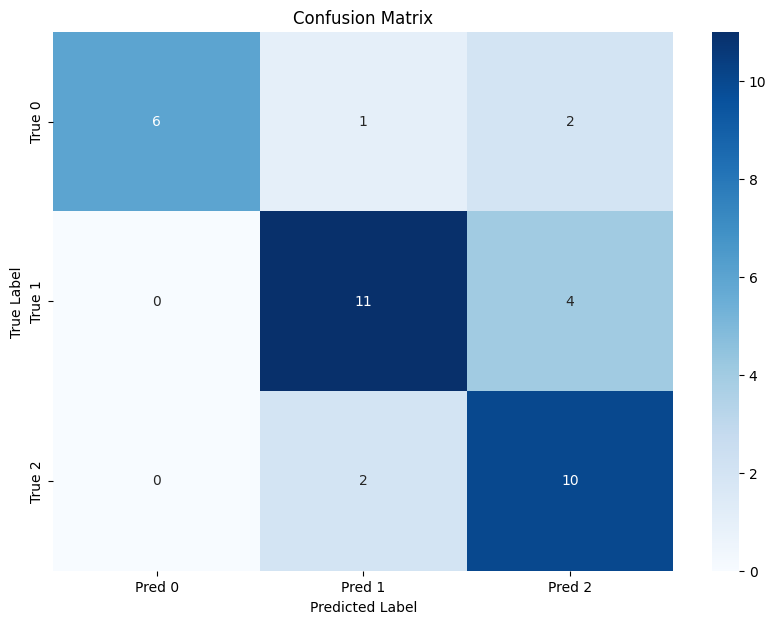

              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80         9
         1.0       0.79      0.73      0.76        15
         2.0       0.62      0.83      0.71        12

    accuracy                           0.75        36
   macro avg       0.80      0.74      0.76        36
weighted avg       0.79      0.75      0.75        36



In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Create a DataFrame for better visualization (optional)
cm_df = pd.DataFrame(cm, 
                     index=['True 0', 'True 1', 'True 2'], 
                     columns=['Pred 0', 'Pred 1', 'Pred 2'])

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report (optional)
from sklearn.metrics import classification_report
print(classification_report(true_labels, pred_labels))

In [32]:
pred_labels

array([2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0])

In [33]:
true_labels

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

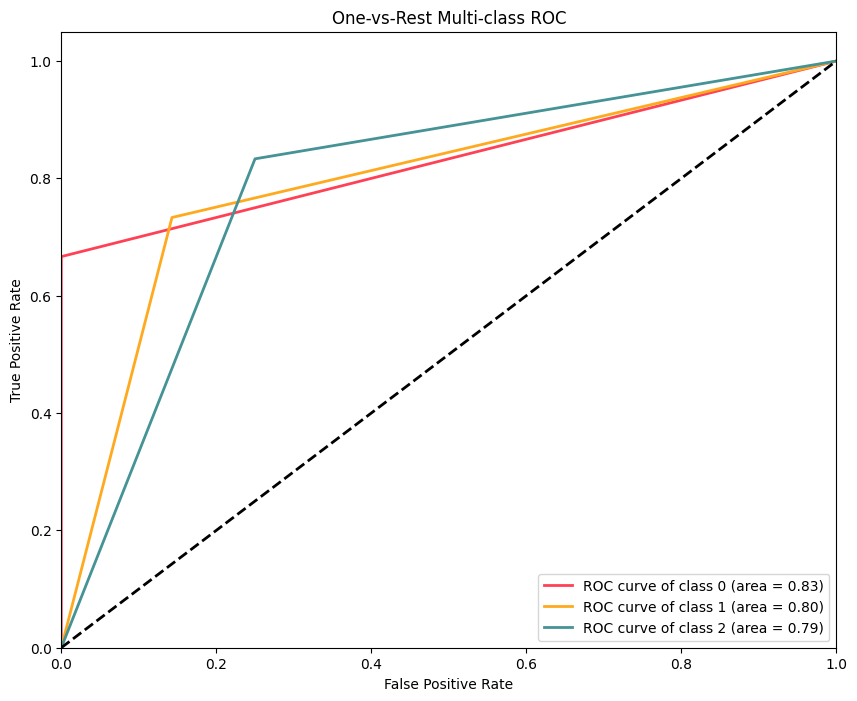

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert pred_labels and true_labels to numpy arrays if they aren't already
pred_labels = np.array([2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2,
                        1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0])
true_labels = np.array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1.,
                        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
                        0., 0.])

# Get the number of classes
n_classes = len(np.unique(true_labels))

# Convert true_labels to one-hot encoded format
true_labels_onehot = label_binarize(true_labels, classes=range(n_classes))

# Convert pred_labels to one-hot encoded format (as a proxy for probabilities)
pred_labels_onehot = label_binarize(pred_labels, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_onehot[:, i], pred_labels_onehot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))

colors = ['#FF4156', '#FFAA1E', '#459395']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

# Segmentation

In [123]:
import numpy as np
from MetricsReloaded.metrics.pairwise_measures import BinaryPairwiseMeasures as BPM
from MetricsReloaded.processes.mixed_measures_processes import MultiLabelPairwiseMeasures as MLPM
from MetricsReloaded.processes.overall_process import ProcessEvaluation as PE
from matplotlib import pyplot as plt

In [120]:
import os
import nibabel as nib
import numpy as np

def load_nifti_files(folder_path):
    nifti_data = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.nii.gz'):
            file_path = os.path.join(folder_path, filename)
            
            img = nib.load(file_path)
            data = img.get_fdata()
            nifti_data.append( data)
    
    return nifti_data

In [121]:
folder_path = 'original_data/pancreas_validation_preds'
pred_masks = load_nifti_files(folder_path)

for filename, data in nifti_arrays:
    print(f"Loaded {filename}: Shape {data.shape}, Data type {data.dtype}")

Loaded quiz_1_154.nii.gz: Shape (195, 125, 132), Data type float64
Loaded quiz_0_244.nii.gz: Shape (200, 96, 124), Data type float64
Loaded quiz_2_088.nii.gz: Shape (171, 132, 54), Data type float64
Loaded quiz_1_090.nii.gz: Shape (186, 100, 39), Data type float64
Loaded quiz_0_253.nii.gz: Shape (197, 119, 99), Data type float64
Loaded quiz_0_254.nii.gz: Shape (166, 166, 119), Data type float64
Loaded quiz_0_184.nii.gz: Shape (181, 109, 50), Data type float64
Loaded quiz_1_093.nii.gz: Shape (215, 103, 55), Data type float64
Loaded quiz_0_168.nii.gz: Shape (309, 251, 61), Data type float64
Loaded quiz_1_211.nii.gz: Shape (203, 121, 48), Data type float64
Loaded quiz_1_231.nii.gz: Shape (153, 110, 48), Data type float64
Loaded quiz_2_089.nii.gz: Shape (185, 110, 62), Data type float64
Loaded quiz_0_187.nii.gz: Shape (191, 169, 98), Data type float64
Loaded quiz_0_174.nii.gz: Shape (140, 94, 43), Data type float64
Loaded quiz_1_221.nii.gz: Shape (169, 109, 111), Data type float64
Loaded q

In [122]:
folder_path = 'original_data/pancreas_validation/labels'
gt_masks = load_nifti_files(folder_path)

for filename, data in nifti_arrays:
    print(f"Loaded {filename}: Shape {data.shape}, Data type {data.dtype}")

Loaded quiz_1_154.nii.gz: Shape (195, 125, 132), Data type float64
Loaded quiz_0_244.nii.gz: Shape (200, 96, 124), Data type float64
Loaded quiz_2_088.nii.gz: Shape (171, 132, 54), Data type float64
Loaded quiz_1_090.nii.gz: Shape (186, 100, 39), Data type float64
Loaded quiz_0_253.nii.gz: Shape (197, 119, 99), Data type float64
Loaded quiz_0_254.nii.gz: Shape (166, 166, 119), Data type float64
Loaded quiz_0_184.nii.gz: Shape (181, 109, 50), Data type float64
Loaded quiz_1_093.nii.gz: Shape (215, 103, 55), Data type float64
Loaded quiz_0_168.nii.gz: Shape (309, 251, 61), Data type float64
Loaded quiz_1_211.nii.gz: Shape (203, 121, 48), Data type float64
Loaded quiz_1_231.nii.gz: Shape (153, 110, 48), Data type float64
Loaded quiz_2_089.nii.gz: Shape (185, 110, 62), Data type float64
Loaded quiz_0_187.nii.gz: Shape (191, 169, 98), Data type float64
Loaded quiz_0_174.nii.gz: Shape (140, 94, 43), Data type float64
Loaded quiz_1_221.nii.gz: Shape (169, 109, 111), Data type float64
Loaded q

In [40]:
print('Creation of dictionary for one single comparison case with two metrics')
bpm = BPM(prediction, reference, measures=['fbeta','nsd'])
dict_seg = bpm.to_dict_meas()
print(dict_seg)

Creation of dictionary for one single comparison case with two metrics
{'fbeta': 0.6238532056512277, 'nsd': 0.75}


In [64]:
print('Creation of dictionary for one single comparison case with two metrics')
bpm = BPM(pred_masks[0], gt_masks[0], measures=['fbeta','nsd'])
dict_seg = bpm.to_dict_meas()
print(dict_seg)

Creation of dictionary for one single comparison case with two metrics
{'fbeta': 0.6369507220310838, 'nsd': 0.6108762754851267}


In [126]:
print("Direct call to the metric to calculate")
bpm.fbeta()

Direct call to the metric to calculate


0.6319058327608561

In [67]:

# Combining multiple np arrays so as to compare item i of predictions with item i of references

# list of reference np arrays
list_ref = gt_masks
# list of prediction np arrays
list_pred = pred_masks
# No use of probability maps in this setting so 
list_prob = [None] * len(gt_masks)

print('Creation of process for multiple cases')
mlpm = MLPM(list_pred, list_ref,list_prob,list_values=[0,1,2],measures_pcc=['fbeta','nsd'],per_case=True)
df_seg, df_mt = mlpm.per_label_dict()
print(df_seg)


Creation of process for multiple cases
0  is treated label


/scratch/alif/MetricsReloaded/MetricsReloaded/processes/mixed_measures_processes.py:780: UserWarning: No probabilistic input or no probabilistic measure so impossible to get multi-threshold metric
  warnings.warn('No probabilistic input or no probabilistic measure so impossible to get multi-threshold metric')


1  is treated label


/scratch/alif/MetricsReloaded/MetricsReloaded/metrics/pairwise_measures.py:655: UserWarning: reference is empty, recall not defined
  warnings.warn("reference is empty, recall not defined")


2  is treated label


/scratch/alif/MetricsReloaded/MetricsReloaded/metrics/pairwise_measures.py:644: UserWarning: prediction empty, ppv not defined but set to 0
  warnings.warn("prediction empty, ppv not defined but set to 0")
/scratch/alif/MetricsReloaded/MetricsReloaded/metrics/pairwise_measures.py:658: UserWarning: prediction is empty but ref not, recall not defined but set to 0
  warnings.warn(


        fbeta       nsd  label  case
0    0.993779  0.942461      0     0
1    0.995257  0.970733      0     1
2    0.995399  0.976583      0     2
3    0.995820  0.978939      0     3
4    0.995489  0.971391      0     4
5    0.992977  0.943823      0     5
6    0.993524  0.980278      0     6
7    0.990295  0.954496      0     7
8    0.992387  0.950253      0     8
9    0.994591  0.975824      0     9
10   0.997248  0.990565      0    10
11   0.993804  0.962912      0    11
12   0.996097  0.969472      0    12
13   0.990437  0.953102      0    13
14   0.996238  0.982252      0    14
15   0.986916  0.920415      0    15
16   0.995800  0.988906      0    16
17   0.993335  0.970414      0    17
18   0.995475  0.978016      0    18
19   0.992164  0.957050      0    19
20   0.997429  0.992816      0    20
21   0.996702  0.988448      0    21
22   0.997048  0.977613      0    22
23   0.989219  0.959082      0    23
24   0.997869  0.987725      0    24
25   0.997723  0.982691      0    25
2

In [ ]:

# # Combining multiple np arrays so as to compare item i of predictions with item i of references

# # list of reference np arrays
# list_ref = gt_masks
# # list of prediction np arrays
# list_pred = pred_masks
# # No use of probability maps in this setting so 
# list_prob = [None] * len(gt_masks)

# print('Creation of process for multiple cases')
# mlpm = MLPM(list_pred, list_ref,list_prob,list_values=[0,1,2],measures_pcc=['fbeta','nsd'],per_case=True)
# df_seg, df_mt = mlpm.per_label_dict()
# print(df_seg)


In [ ]:

# # Showing what happens when there is an error in input: here asking to calculate auroc without a probabilistic map
# print("Creation of multi process with error in choice of measure due to absence of probabilistic input")
# mlpm = MLPM(list_pred, list_ref,list_prob,list_values=[0,1,2],measures_pcc=['fbeta'],measures_boundary=['nsd'],measures_mt=['auroc'],per_case=True, pixdim=[1,1])
# df_seg_v2, df_mt = mlpm.per_label_dict()
# print(df_seg_v2)


In [73]:

# How to implement the full process when considering the three lists and resulting in a PE object 
print("Creation of the full process")
data = {}
data['pred_class'] = list_pred
data['ref_class'] = list_ref
data['pred_prob'] = list_prob
data['list_values'] = [0,1,2] # Only one labelling - binary choice here
pe = PE(data, 'SemS',measures_overlap=['fbeta'],measures_boundary=['nsd'],case=True)

print(pe.resseg)

Creation of the full process
0  is treated label
1  is treated label
2  is treated label


/scratch/alif/MetricsReloaded/MetricsReloaded/metrics/pairwise_measures.py:644: UserWarning: prediction empty, ppv not defined but set to 0
  warnings.warn("prediction empty, ppv not defined but set to 0")
/scratch/alif/MetricsReloaded/MetricsReloaded/metrics/pairwise_measures.py:658: UserWarning: prediction is empty but ref not, recall not defined but set to 0
  warnings.warn(


        fbeta       nsd  label  case  weights_labels  prevalence_labels
0    0.993779  0.942461      0     0               1            3040757
1    0.995257  0.970733      0     1               1            2211027
2    0.995399  0.976583      0     2               1            1192193
3    0.995820  0.978939      0     3               1             705107
4    0.995489  0.971391      0     4               1            2163364
5    0.992977  0.943823      0     5               1            3044304
6    0.993524  0.980278      0     6               1             895395
7    0.990295  0.954496      0     7               1            1121988
8    0.992387  0.950253      0     8               1            4418770
9    0.994591  0.975824      0     9               1            1103118
10   0.997248  0.990565      0    10               1             767320
11   0.993804  0.962912      0    11               1            1202188
12   0.996097  0.969472      0    12               1            

In [128]:

# How to implement the full process when considering the three lists and resulting in a PE object 
print("Creation of the full process")
data = {}
data['pred_class'] = list_pred
data['ref_class'] = list_ref
data['pred_prob'] = list_prob
data['list_values'] = [0,1,2] # Only one labelling - binary choice here
pe = PE(data, 'SemS',measures_overlap=['fbeta'],measures_boundary=['nsd'],case=True)

print(pe.resseg)

Creation of the full process
0  is treated label
1  is treated label
2  is treated label


/scratch/alif/MetricsReloaded/MetricsReloaded/metrics/pairwise_measures.py:644: UserWarning: prediction empty, ppv not defined but set to 0
  warnings.warn("prediction empty, ppv not defined but set to 0")
/scratch/alif/MetricsReloaded/MetricsReloaded/metrics/pairwise_measures.py:658: UserWarning: prediction is empty but ref not, recall not defined but set to 0
  warnings.warn(


        fbeta       nsd  label  case  weights_labels  prevalence_labels
0    0.992708  0.937397      0     0               1            3040757
1    0.994580  0.966127      0     1               1            2211027
2    0.994772  0.970201      0     2               1            1192193
3    0.996491  0.981192      0     3               1             705107
4    0.995829  0.970838      0     4               1            2163364
5    0.994226  0.950908      0     5               1            3044304
6    0.994748  0.980978      0     6               1             895395
7    0.991432  0.962113      0     7               1            1121988
8    0.994235  0.960514      0     8               1            4418770
9    0.995383  0.980317      0     9               1            1103118
10   0.997990  0.995476      0    10               1             767320
11   0.994939  0.964899      0    11               1            1202188
12   0.996948  0.979849      0    12               1            

In [129]:
pe.resseg[pe.resseg['label'] == 0]['fbeta'].mean()

0.9944001526930073

In [131]:
pe.resseg[pe.resseg['label'] == 1]['fbeta'].mean()

0.30063162730257065

In [132]:
pe.resseg[pe.resseg['label'] == 2]['fbeta'].mean()

0.20327263007504462

In [133]:
pe.resseg[pe.resseg['label'] == 0]['nsd'].mean()

0.9728529273395989

In [134]:
pe.resseg[pe.resseg['label'] == 1]['nsd'].mean()

0.2785041087588617

In [135]:
pe.resseg[pe.resseg['label'] == 2]['nsd'].mean()

0.15251256440467656